## Matheus Araujo Pinheiro

## Katlyn Ribeiro Almeida

## Julia Graziosi Ortiz

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.optimize import minimize

In [14]:
# Definindo os pontos fixos
pontos = np.array([
    (-2, 0), (-3/2, 1/2), (-1, 1), (-1/2, 3/2),
    (1/2, 3/2), (1, 1), (3/2, 1/2), (2, 0)
])

# Extraindo x e y dos pontos fixos
x_pontos = pontos[:, 0]
y_pontos = pontos[:, 1]

In [15]:
# Função T(x) que define a borda da tábua
def T(x):
    return np.piecewise(x, [x < 0, x >= 0], [lambda x: 2 + x, lambda x: 2 - x])

# Função para calcular a spline cúbica natural e a distância Q nos intervalos especificados
def calcula_spline(v):
    # Adicionando o ponto extra no meio (0, v)
    x = np.insert(x_pontos, 4, 0)  # Insere 0 na posição central
    y = np.insert(y_pontos, 4, v)  # Insere o valor v na posição correspondente
    
    # Criando a spline cúbica natural
    spline = CubicSpline(x, y, bc_type='natural')
    
    # Definindo os pontos de amostragem para calcular a diferença nos intervalos específicos
    x_sample1 = np.linspace(-2, -1/2, 250)
    x_sample2 = np.linspace(1/2, 2, 250)
    x_sample = np.concatenate((x_sample1, x_sample2))
    
    y_spline = spline(x_sample)
    y_table = T(x_sample)
    
    # Calculando a distância quadrática Q nos intervalos especificados
    Q = np.sum((y_spline - y_table) ** 2)
    return Q, spline

# Função objetivo para minimizar Q
def objetivo(v):
    Q, _ = calcula_spline(v[0])  # Como v é um array, pegamos o primeiro elemento
    return Q

# Intervalo de busca para v
interv = [(3/2, 2)]

# Otimizando o valor de v que minimiza Q
result = minimize(objetivo, x0=[1.75], bounds=interv)

# Obtendo o valor otimizado de v
v_otimo = result.x[0]
#v_otimo = 3/2
#v_otimo = 2
#v_otimo = 1.8593

# Calculando a spline e Q com o valor ótimo de v
Q_minimizada, spline_otima = calcula_spline(v_otimo)

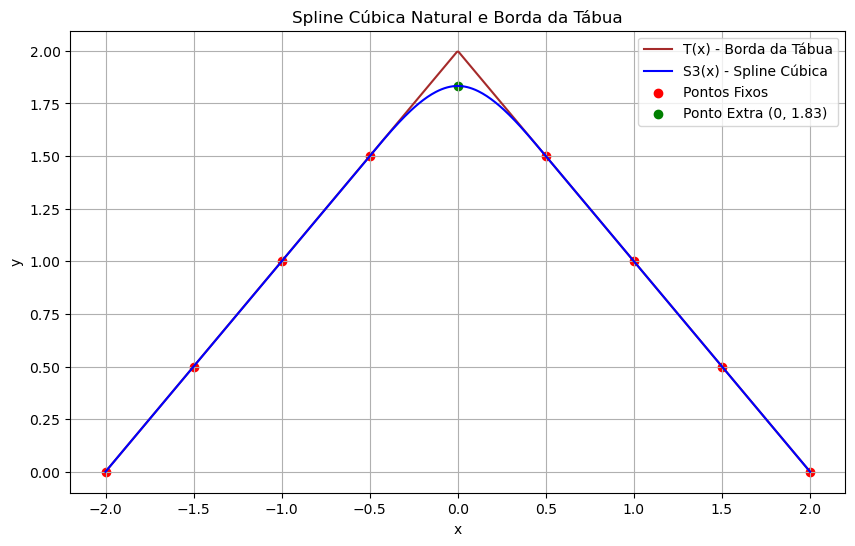

Valor ótimo de v: 1.8333
Valor minimizado de Q: 0.0000


In [16]:
# Plotando os resultados
x_plot = np.linspace(-2, 2, 500)
y_spline_plot = spline_otima(x_plot)
y_table_plot = T(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_table_plot, label='T(x) - Borda da Tábua', color='brown')
plt.plot(x_plot, y_spline_plot, label='S3(x) - Spline Cúbica', color='blue')
plt.scatter(x_pontos, y_pontos, color='red', label='Pontos Fixos')
plt.scatter(0, v_otimo, color='green', label=f'Ponto Extra (0, {v_otimo:.2f})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Spline Cúbica Natural e Borda da Tábua')
plt.legend()
plt.grid(True)

#plt.xlim(-1/2, 1/2)  # Set x-axis limits
#plt.ylim(1.5, 2)  # Set y-axis limits

plt.show()

# Exibindo o valor ótimo de v e Q minimizado
print(f"Valor ótimo de v: {v_otimo:.4f}")
print(f"Valor minimizado de Q: {Q_minimizada:.4f}")